# analytical solution

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Аналитическое решение линейной регрессии

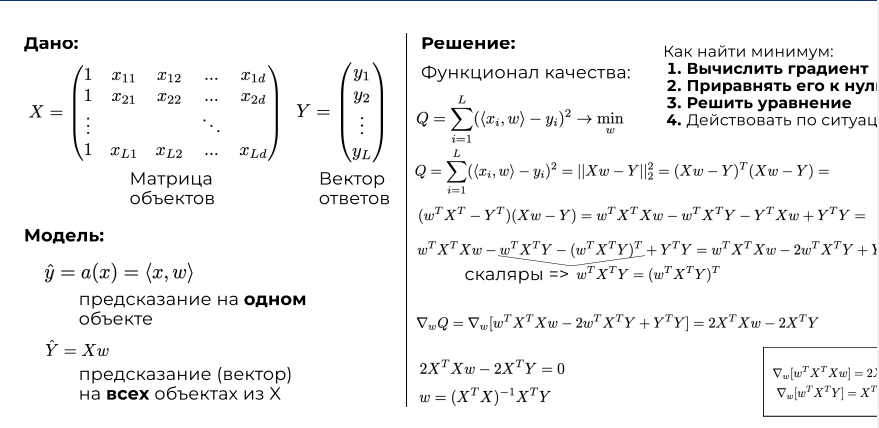

### Сложность O(n^3)

In [ ]:
X = np.linspace(0,10,50)
b = np.random.rand(50)
Y = (X+b)**2
Y+=100

In [ ]:
np.ones_like(X).shape

(50,)

In [ ]:
X.shape

(50,)

In [ ]:

X_with_bias = np.vstack((np.ones_like(X) ,X)).T

w = np.dot(np.linalg.inv(np.dot(X_with_bias.T, X_with_bias)), np.dot(X_with_bias.T, Y))



MSE = np.mean((Y - np.dot(X_with_bias, w))**2)
MAE = np.mean(np.abs(Y - np.dot(X_with_bias, w)))
print(f'MSE: {MSE}\tMAE: {MAE}')



ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
XX = X**2

In [ ]:
X_2 = np.vstack((X_with_bias.T, XX)).T

In [ ]:
X_2

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.04081633e-01, 4.16493128e-02],
       [1.00000000e+00, 4.08163265e-01, 1.66597251e-01],
       [1.00000000e+00, 6.12244898e-01, 3.74843815e-01],
       [1.00000000e+00, 8.16326531e-01, 6.66389005e-01],
       [1.00000000e+00, 1.02040816e+00, 1.04123282e+00],
       [1.00000000e+00, 1.22448980e+00, 1.49937526e+00],
       [1.00000000e+00, 1.42857143e+00, 2.04081633e+00],
       [1.00000000e+00, 1.63265306e+00, 2.66555602e+00],
       [1.00000000e+00, 1.83673469e+00, 3.37359434e+00],
       [1.00000000e+00, 2.04081633e+00, 4.16493128e+00],
       [1.00000000e+00, 2.24489796e+00, 5.03956685e+00],
       [1.00000000e+00, 2.44897959e+00, 5.99750104e+00],
       [1.00000000e+00, 2.65306122e+00, 7.03873386e+00],
       [1.00000000e+00, 2.85714286e+00, 8.16326531e+00],
       [1.00000000e+00, 3.06122449e+00, 9.37109538e+00],
       [1.00000000e+00, 3.26530612e+00, 1.06622241e+01],
       [1.00000000e+00, 3.46938

In [ ]:
X_with_bias

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.20408163],
       [ 1.        ,  0.40816327],
       [ 1.        ,  0.6122449 ],
       [ 1.        ,  0.81632653],
       [ 1.        ,  1.02040816],
       [ 1.        ,  1.2244898 ],
       [ 1.        ,  1.42857143],
       [ 1.        ,  1.63265306],
       [ 1.        ,  1.83673469],
       [ 1.        ,  2.04081633],
       [ 1.        ,  2.24489796],
       [ 1.        ,  2.44897959],
       [ 1.        ,  2.65306122],
       [ 1.        ,  2.85714286],
       [ 1.        ,  3.06122449],
       [ 1.        ,  3.26530612],
       [ 1.        ,  3.46938776],
       [ 1.        ,  3.67346939],
       [ 1.        ,  3.87755102],
       [ 1.        ,  4.08163265],
       [ 1.        ,  4.28571429],
       [ 1.        ,  4.48979592],
       [ 1.        ,  4.69387755],
       [ 1.        ,  4.89795918],
       [ 1.        ,  5.10204082],
       [ 1.        ,  5.30612245],
       [ 1.        ,  5.51020408],
       [ 1.        ,

In [ ]:
Y


array([100.14532865, 100.43456116, 101.08104416, 101.20713856,
       101.45507583, 101.02449141, 101.93895023, 102.34091111,
       102.24113776, 102.19278665, 102.16717097, 102.33904956,
       102.93762302, 103.47657666, 103.66642742, 103.69884381,
       103.43122947, 103.85000458, 104.24745362, 104.83346774,
       104.85958838, 104.35872257, 105.08648885, 104.90132475,
       105.86879281, 105.4449559 , 105.91907827, 105.57320709,
       106.21125227, 106.08719103, 106.82535214, 106.34098986,
       106.91559367, 107.71338311, 107.75677582, 108.08613039,
       108.10427523, 107.97092114, 108.08471025, 108.86342698,
       108.26062945, 108.37551659, 109.21926548, 108.94114347,
       109.26751912, 109.74697829, 110.12428087, 109.86773272,
       110.51432258, 110.75813389])

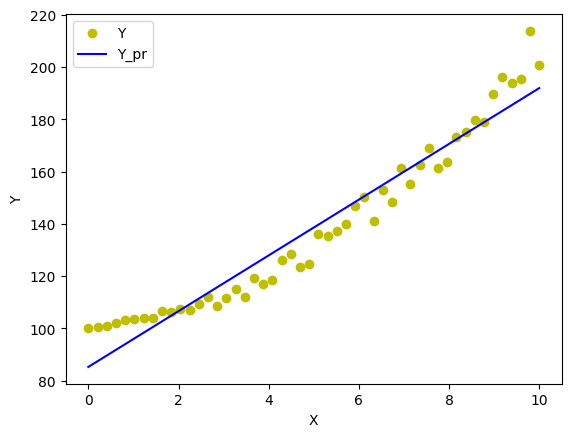

In [ ]:
plt.plot(X, Y, linestyle=' ', marker='o', color='y')
plt.plot(X, np.dot(X_with_bias, w), color='b')  # Построение предсказанных значений

plt.xlabel("X")
plt.ylabel('Y')
plt.legend(["Y", "Y_pr"])
plt.show()

## Численное решение линейной регрессии

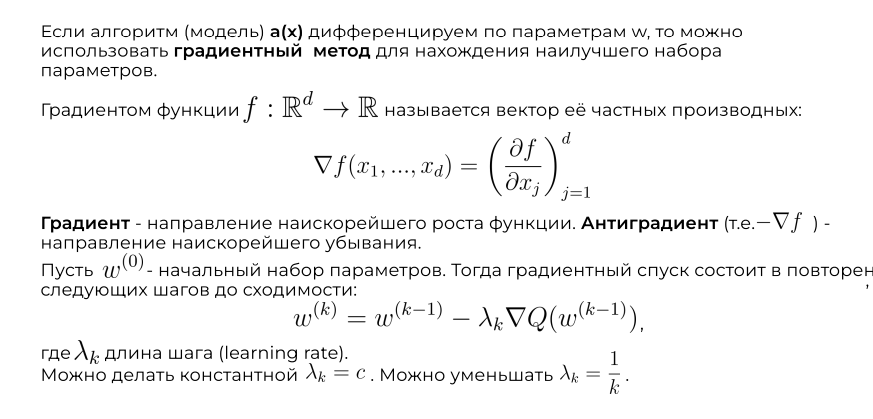

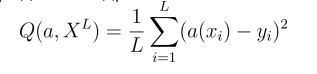

### Сложность O(nk)


# linear regression

In [ ]:
import numpy as np

def loss(X, y, w):
    n = len(y)
    return -2 / n * np.dot(X.T, y - np.dot(X, w))
c
def gradient_decent(X, y, lim_k=10000, error=0.000001, lr=0.01):
    w_0 = np.random.rand(X.shape[1])
    w_k_1 = w_0
    k = 1
    w_k = w_0 - lr * loss(X, y, w_0)
    i = 0
    e_dist = np.dot((w_k - w_k_1).T, (w_k - w_k_1))

    while abs(e_dist) > error and i < lim_k:
        if np.isnan(w_k).any():
            print(f"NaN detected at iteration {i}")
            break

        w_k_1 = w_k
        w_k = w_k - lr * loss(X, y, w_k)
        k += 1
        i += 1
        e_dist = np.dot((w_k - w_k_1).T, (w_k - w_k_1))

    return w_k

# Генерация данных
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)

# Преобразование X в формат столбца
X = X[:, np.newaxis]

# Создание полиномиальных признаков (вторая степень)
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

# Нормализация данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_poly = scaler.fit_transform(X_poly)

# Обучение модели
wk = gradient_decent(X_poly, y)

print("Weights:", wk)


Weights: [  0.96193638   2.8090602  -32.22618044]


In [ ]:
def loss(X, y, w):
    n = len(y)

    return -2 / n * np.dot(X.T, y - np.dot(X, w))

def gradient_decent(X, y, lim_k = 10000, error=0.000001, lr = 0.01):
    w_0 = np.random.rand(3)
    w_k_1 = w_0
    k = 1
    w_k = w_0 -  1 / k * loss(X, y, w_0)
    i=0
    e_dist = np.dot((w_k-w_k_1).T, (w_k-w_k_1))
    while abs(e_dist) > error and i < lim_k :

        w_k_1 = w_k
        w_k = w_k - lr * loss(X, y, w_k)

        k+=1
        i+=1
        e_dist = np.dot((w_k-w_k_1).T, (w_k-w_k_1))
    return w_k

wk = gradient_decent(X_2, Y)


In [ ]:
wk

array([nan, nan, nan])

In [ ]:
mse = np.mean((Y - np.dot(X_2,wk))**2)
mae = np.mean(np.abs(Y - np.dot(X_2,wk)))

In [ ]:
np.dot(X_2,wk)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

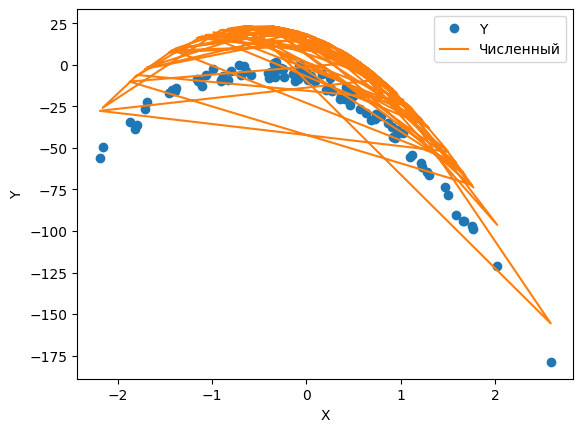

In [ ]:
plt.plot(X_poly[:, 1], y, linestyle=' ',marker='o')
plt.plot(X_poly[:, 1], np.dot(X_poly,wk))
plt.xlabel("X")
plt.ylabel('Y')
plt.legend(["Y", "Численный","Аналитический"])
plt.show()

# linear classifier



In [ ]:
X_poly

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def generate_synthetic_data(N, mean1, std1, mean2, std2):
    # Генерируем признаки для первого класса
    class1_features = np.random.normal(loc=mean1, scale=std1, size=(N//2, 2))
    # Генерируем признаки для второго класса
    class2_features = np.random.normal(loc=mean2, scale=std2, size=(N//2, 2))
    class2_features[:,1] -=0.5
    class2_features[:,0] +=1
    # Создаем метки классов (0 - первый класс, 1 - второй класс)
    class1_labels = -1*np.ones((N//2, 1))
    class2_labels = np.ones((N//2, 1))

    # Объединяем признаки и метки классов
    class1_data = np.concatenate((class1_features, class1_labels), axis=1)
    class2_data = np.concatenate((class2_features, class2_labels), axis=1)

    # Объединяем данные двух классов
    synthetic_data = np.concatenate((class1_data, class2_data), axis=0)

    # Перемешиваем данные
    np.random.shuffle(synthetic_data)

    return synthetic_data

# Параметры распределений для генерации данных
N = 1000  # Общее количество объектов
mean1 = 0.4
std1 = 0.5
mean2 = 0.9
std2 = 0.5

# Генерация синтетических данных
synthetic_data = generate_synthetic_data(N, mean1, std1, mean2, std2)

# Проверка первых 5 объектов
print(synthetic_data)


[[ 1.74984756  0.25025927  1.        ]
 [ 1.84880258  0.24991155  1.        ]
 [ 0.86091556 -0.15001047 -1.        ]
 ...
 [ 0.27260367  1.0825194  -1.        ]
 [ 0.53446083  0.73781921 -1.        ]
 [ 1.79543582  0.13982368  1.        ]]


In [3]:
from sklearn.model_selection import train_test_split

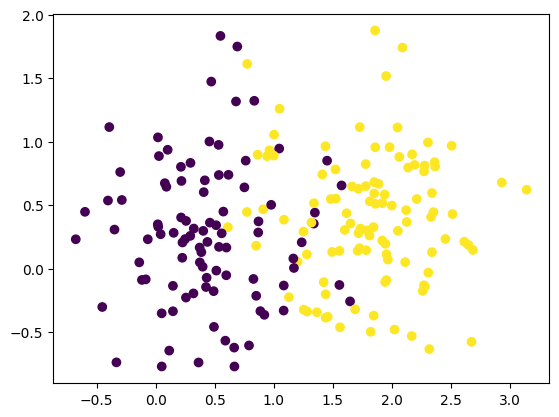

In [4]:
X = synthetic_data[:, :-1]  # Все столбцы кроме последнего
y = synthetic_data[:, -1]
ones = np.ones((1000,1))
X_with_bias = np.vstack((ones.T,X.T)).T
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.2, random_state=42)
plt.scatter(X_test[:,1], X_test[:,2], c = y_test)


plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#poly = PolynomialFeatures(2)
#X_ = poly.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

In [ ]:
#X_train

In [5]:
def loss(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def df(w, X, y):
    L = X.shape[0]
    predictions = loss(np.dot(X, w))

    gradient = np.dot(X.T, predictions - y) / L

    return gradient

In [7]:
def grad_decent(w,rate,grad):
  return w-rate*grad

In [8]:
def fit(x, y, rate, w, epoch_cnt, lm = 0.001):
  for i in range(epoch_cnt):
    grad_calc = df(w,x,y)
    wk = grad_decent(w,rate,grad_calc)
    if i%10 == 0:
      print(sum(abs(np.maximum(0, np.sign(np.dot(x, wk)))-np.maximum(0,y)))/len(y))

    w = wk

  return w




In [9]:
w_0 = np.random.rand(3)

In [10]:
w_0

array([0.91503155, 0.37317378, 0.88654001])

In [ ]:
wk = fit(X_train,y_train,0.01,w_0,1000)
wk[0] += abs(np.mean(np.dot(X_test,wk)))

In [ ]:
wk

array([-1.77518141,  1.86164191, -1.01789402])

In [15]:
sum(abs(np.maximum(0, np.sign(np.dot(X_test, wk)))-np.maximum(0,y_test)))/len(y_test)

0.12

In [16]:
import pandas as pd

In [17]:
accuracy = np.mean(y_test == np.sign(np.dot(X_test, wk)))

# confusion matrix
confusion_matrix = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(np.sign(np.dot(X_test, wk)), name='Predicted'))
print('Confusion Matrix:')
print(confusion_matrix)

# precision
precision = np.sum((y_test == 1) & (np.sign(np.dot(X_test, wk)) == 1)) / np.sum(np.sign(np.dot(X_test, wk)) == 1)
print(f'Precision: {round(precision,2)}')

# recall
recall = np.sum((y_test == 1) & (np.sign(np.dot(X_test, wk)) == 1)) / np.sum(y_test == 1)
print(f'Recall: {recall}')

Confusion Matrix:
Predicted  -1.0   1.0
Actual               
-1.0         82    12
 1.0         12    94
Precision: 0.89
Recall: 0.8867924528301887


In [18]:
accuracy

0.88

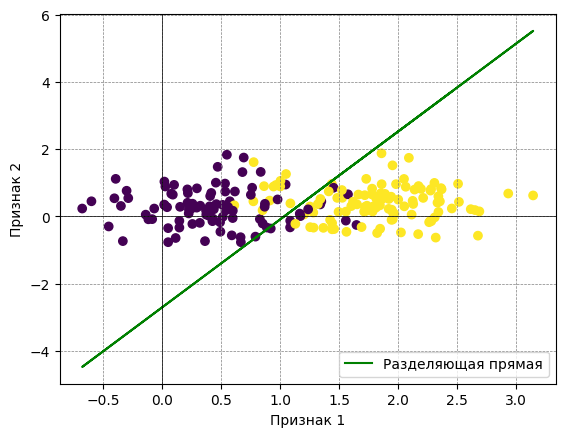

In [19]:
bias, w1, w2 = wk[0], wk[1], wk[2]
x = X_test[:, 1]
y = (-w1 * x - bias) / w2

plt.figure()
plt.plot(x, y, label='Разделяющая прямая', color='g')
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [ ]:


# Рисуем данные
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test)

# Рисуем разделяющую линию

x_values = [np.min(X_test[:, 1]), np.max(X_test[:, 1])]

y_values = -np.array(x_values)*wk[1]/wk[2] - wk[0]/wk[2]


if max(y_values)>10:
  x_values = [np.min(X_test[:, 2]), np.max(X_test[:, 2])]
  y_values = -np.array(x_values)*wk[2]/wk[1] - wk[0]/wk[1]

  plt.plot(y_values,x_values, label='Разделяющая линия')
else:
  plt.plot(x_values,y_values, label='Разделяющая линия')


plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()
print(max(y_values))

#EX 2 дерево решений



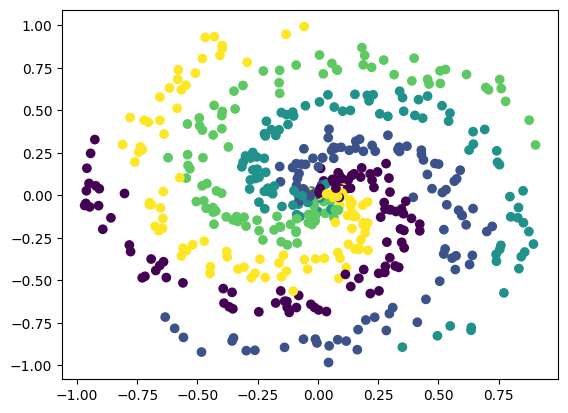

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(num_samples, num_features, num_classes, variances):
    X = np.zeros((num_samples * num_classes, num_features))
    y = np.zeros(num_samples * num_classes, dtype='uint8')
    for j in range(num_classes):
        ix = range(num_samples * j, num_samples * (j + 1))
        r = np.linspace(0.0, 1, num_samples)  # радиус
        t = np.linspace(j * 5, (j + 1) * 5, num_samples) + np.random.randn(num_samples) * 0.2  # угол
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        # Добавление шума с указанной дисперсией для каждого класса
        X[ix] += np.random.randn(num_samples, num_features) * variances[j]
        y[ix] = j
    return X, y

# Параметры
num_samples = 100  # количество образцов на класс
num_features = 2  # количество признаков (x и y координаты)
num_classes = 5  # количество классов
variances = [0.03, 0.03, 0.03, 0.03, 0.03]  # дисперсия шума для каждого класса

# Генерация данных
X, y = generate_spiral_data(num_samples, num_features, num_classes, variances)

# Преобразование меток в нужный формат
y = y + 1  # чтобы метки начинались с 1, а не с 0

# Объединение данных и меток
data = np.concatenate([X, y.reshape(-1, 1)], axis=1)

# Перемешивание данных
np.random.shuffle(data)

# Разделение на признаки и метки
X = data[:, :num_features]
y = data[:, num_features]

# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np


num_samples = 1000
num_features = 2
num_classes = 5

lb1 = np.full((100, 1),1)
lb2 = np.full((100, 1),2)
lb3 = np.full((100, 1),3)
lb4 = np.full((100, 1),4)
lb5 = np.full((100, 1),5)

yy = np.concatenate((lb1,lb2,lb3,lb4,lb5), axis = 0)

dat1 = np.concatenate((np.random.normal(loc=0.5, scale = 0.5, size=(100,2)),lb1),axis = 1)
dat2 = np.concatenate((np.random.normal(loc=0.3, scale = 0.4, size=(100,2)),lb2),axis = 1)
dat3 = np.concatenate((np.random.normal(loc=0.5, scale = 0.6, size=(100,2)),lb3),axis = 1)
dat4 = np.concatenate((np.random.normal(loc=0.6, scale = 0.4, size=(100,2)),lb4),axis = 1)
dat5 = np.concatenate((np.random.normal(loc=0.7, scale = 0.7, size=(100,2)),lb5),axis = 1)

dat1[:,1] += 3
dat1[:,0] -= 0.2
dat3[:,0] += 1
dat4[:,1] +=3
dat4[:,0] += 1
dat5[:,1] +=1.5
dat5[:,0] +=0.5
dd = np.concatenate((dat1,dat2,dat3,dat4,dat5), axis = 0)
np.random.shuffle(dd)


In [ ]:
X = dd[:, :-1]  # Все столбцы кроме последнего
y = dd[:, -1]

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

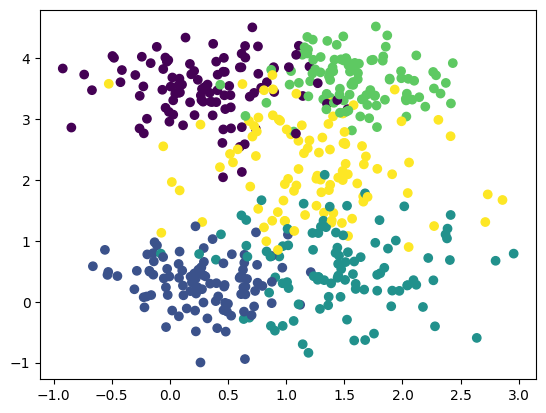

In [ ]:
plt.scatter(dd[:,0],dd[:,1], c= dd[:,2])


In [22]:
from collections import Counter

In [23]:
def _entropy(s):

  counts = np.bincount(np.array(s, dtype=np.int64))

  percentages = counts / len(s)

  entropy = 0
  for pct in percentages:
      if pct > 0:
          entropy += pct * np.log2(pct)
  return -entropy

In [24]:
def _information_gain(parent, left_child, right_child):

  num_left = len(left_child) / len(parent)
  num_right = len(right_child) / len(parent)

  return _entropy(parent) - (num_left * _entropy(left_child) + num_right * _entropy(right_child))

In [25]:
def _best_split(X, y):
  best_split = {}
  best_info_gain = -1
  n_rows, n_cols = X.shape

  for f_idx in range(n_cols):
      X_curr = X[:, f_idx]


      for threshold in np.unique(X_curr):
          df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
          df_left = np.array([row for row in df if row[f_idx] <= threshold])
          df_right = np.array([row for row in df if row[f_idx] > threshold])

          if len(df_right) > 0 and len(df_left)>0:

              y = df[:, -1]
              y_left = df_left[:, -1]
              y_right = df_right[:, -1]
              gain = _information_gain(y, y_left, y_right)
              if gain > best_info_gain:
                  best_split = {
                      'feature_index': f_idx,
                      'threshold': threshold,
                      'df_left': df_left,
                      'df_right': df_right,
                      'gain': gain
                  }
                  best_info_gain = gain

  return best_split

In [39]:
def _build(X, y, depth=0, min_samples_split = 2, max_depth = 30):

  n_rows, n_cols = X.shape
  if n_rows >= min_samples_split and depth <= max_depth:
      best = _best_split(X, y)
      if best['gain'] > 0.0:
          left = _build(
              X=best['df_left'][:, :-1],
              y=best['df_left'][:, -1],
              depth=depth + 1
          )
          right = _build(
              X=best['df_right'][:, :-1],
              y=best['df_right'][:, -1],
              depth=depth + 1
          )
          Nodes = {
                "feature":best['feature_index'],
                "threshold":best['threshold'],
                "data_left":left,
                "data_right":right,
                "gain":best['gain']
                }
          return Nodes
  return Counter(y).most_common(1)[0][0]

In [29]:
def fit(X, y):

  return _build(X, y)

In [30]:
def _predict(x, tree):

  node = tree
  for i in range(len(tree)-1):
    while type(node) != np.float64:
      if x[node["feature"]] <= node["threshold"]:
        node = node['data_left']
      else:
        node = node["data_right"]
  return node

In [31]:
def predict(X, model):

  return [_predict(x, model) for x in X]

In [32]:
np.float64

numpy.float64

In [40]:
model = fit(X_train, y_train)

In [ ]:
model

{'feature': 0,
 'threshold': 0.4060009386268137,
 'data_left': {'feature': 1,
  'threshold': -0.4691218299490601,
  'data_left': 1.0,
  'data_right': 5.0,
  'gain': 0.20074937189819053},
 'data_right': {'feature': 1,
  'threshold': 0.26334726084329774,
  'data_left': 2.0,
  'data_right': 3.0,
  'gain': 0.4894269032122174},
 'gain': 0.1655159917618212}

In [ ]:
import numpy as np
N = 3
K = 4

# Создаем случайные предсказанные вероятности
P = np.random.rand(N, K)

# Выводим предсказанные вероятности
print(P)

[[0.26019175 0.36509652 0.90671279 0.53649693]
 [0.93572375 0.70802434 0.98852396 0.08051604]
 [0.41567156 0.1922593  0.96183945 0.7613736 ]]


In [ ]:
len(model)

5

In [ ]:
xxx = [[0,0]]

In [41]:
preds = predict(X_test,model)

In [42]:
np.mean(y_test == preds)

0.86

In [ ]:
preds

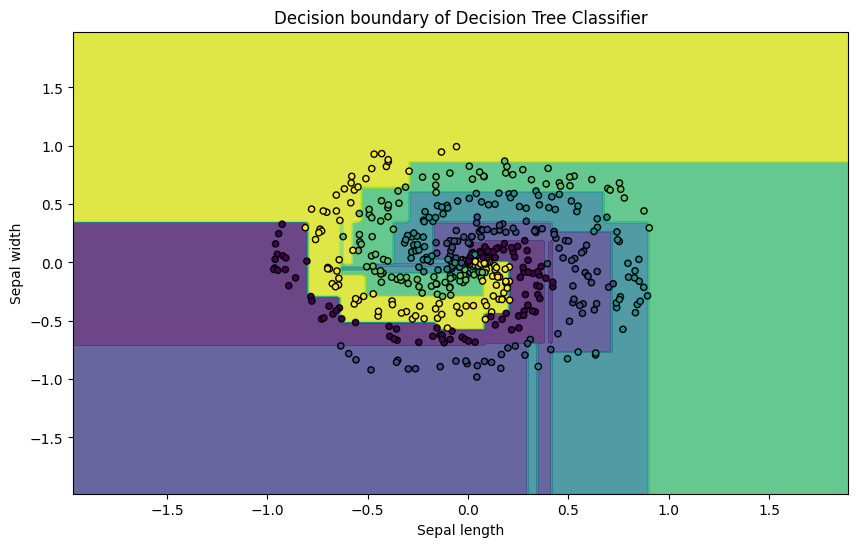

In [43]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
preds = predict(np.c_[xx.ravel(), yy.ravel()], model)
preds = np.array(preds).reshape(xx.shape)

# Отображение разделений классов на графике
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, preds, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision boundary of Decision Tree Classifier')
plt.show()


# Ex 3

# Random forest

In [44]:
def bootstrap(Z, num_samples):
  y=[]
  x=[]

  for i in range(num_samples):
    c=np.copy(Z)
    np.random.shuffle(c)
    x.append(c[:, :-1])
    y.append(c[:, -1])

  return x,y

In [45]:
bx, by = bootstrap(data, 100)

In [46]:
def predict_for_Random_f(X, models):
  predsum = []
  predicts = []

  for i in models:
    predicts.append(np.array(predict(X,i)))
  predicts
  predsum = np.array(predicts[0])

  for i in range(1, len(predicts)):
    predsum+=predicts[i]


  return predsum // len(models)


In [47]:
models = []

In [48]:
N = 100

In [49]:
for i in range(N):
  models.append(fit(bx[i], by[i]))

In [50]:
Rprediction = predict_for_Random_f(X_test, models)

In [ ]:
Rprediction

In [51]:
accur = np.mean(y_test == Rprediction)

In [52]:
accur

1.0

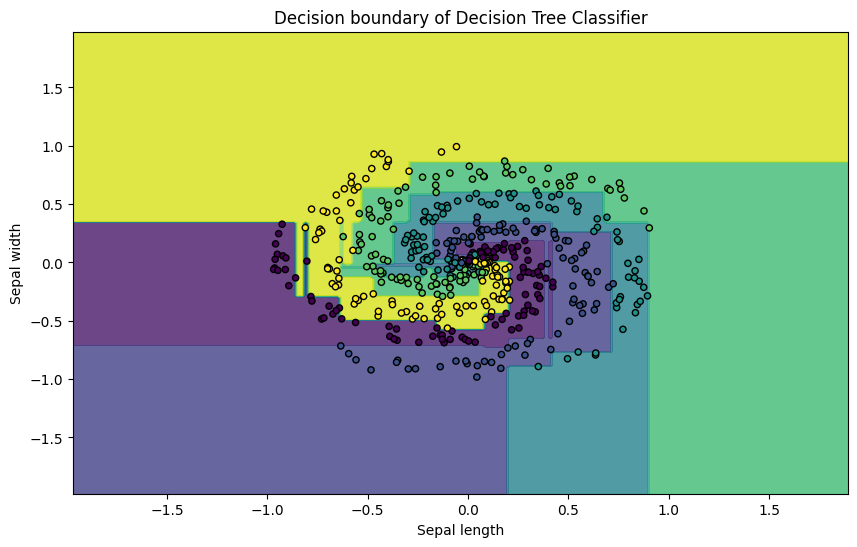

In [53]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
preds = predict_for_Random_f(np.c_[xx.ravel(), yy.ravel()], models)
preds = np.array(preds).reshape(xx.shape)

# Отображение разделений классов на графике
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, preds, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision boundary of Decision Tree Classifier')
plt.show()


# KNN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [ ]:
N = 100

In [ ]:
class1 = np.random.normal(loc=0.3, scale=0.3, size=(N, 2))
class2 = np.random.normal(loc=0.9, scale=0.3, size=(N, 2))

class1Answer = np.ones(N) * (-1)
class2Answer = np.ones(N)

X = np.vstack([class1, class2])
bias = np.ones((N*2, 1))
X_train = np.hstack([bias, X])
y = np.hstack([class1Answer, class2Answer])
dataset = np.hstack([X_train, y[..., np.newaxis]])
np.random.shuffle(dataset)

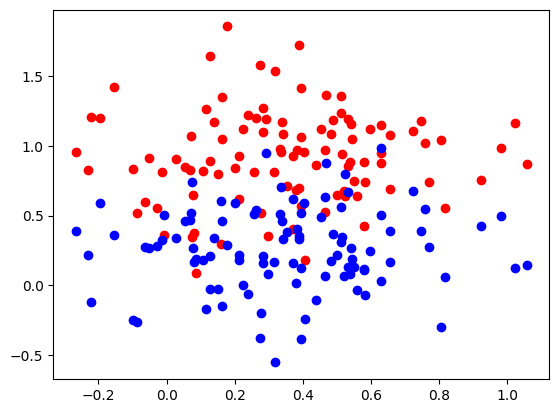

In [ ]:
plt.plot(class1[:,0],class2[:,1], linestyle=' ', marker='o', color = 'r')
plt.plot(class1[:,0], class1[:,1], marker='o', color = 'b' , linestyle=' ')

plt.show();

In [ ]:
X_train = dataset[:, :3]
Y_train = dataset[:, 3]

In [ ]:
class1Test = np.random.normal(loc=0.5, scale=0.3, size=(20, 2))
class2Test = np.random.normal(loc=0.9, scale=0.3, size=(20, 2))
class1AnswerTest = np.ones(20) * (-1)
class2AnswerTest = np.ones(20)

X_test = np.vstack([class1Test, class2Test])
bias = np.ones((20*2, 1))
X_test = np.hstack([bias, X_test])
y_test = np.hstack([class1AnswerTest, class2AnswerTest])

In [ ]:
def euclidean_distance(data1, data2):
    distance = 0
    for i in range (len(data1) - 1):
        distance += (data1[i] - data2[i]) ** 2
    return math.sqrt(distance)

In [ ]:
def get_neighbors(train, test, k):
    distances = [1]*len(train)
    for i in range (len(train)):
      distances[i] = (train[i][-1], euclidean_distance(train[i], test))
    distances.sort(key=lambda elem: elem[1])
    neighbors = [1]*k
    for i in range(k):
      neighbors[i] = distances[i][0]
      print(neighbors[i])
    return neighbors

In [ ]:
def prediction(neighbors):
    count = {}
    for instance in neighbors:
        if instance in count:
            count[instance] +=1
        else :
            count[instance] = 1
    target = max(count.items(), key=lambda x: x[1])[0]
    return int(target)

In [ ]:
predictions = []
dataset_test = np.hstack([X_test, y_test[..., np.newaxis]])
for x in range (len(dataset_test)):
    neighbors = get_neighbors(dataset_test, dataset_test[x], k=4)
    result = prediction(neighbors)
    predictions.append(result)
accuracy = np.mean(dataset_test[:,-1] == predictions)
print(f'Accuracy: {accuracy}')

object:[ 1.          0.23293059  0.49469969 -1.        ]
-1.0
-1.0
-1.0
-1.0
sdsdsd:-1
object:[ 1.          0.60708897 -0.12589777 -1.        ]
-1.0
-1.0
-1.0
-1.0
sdsdsd:-1
object:[ 1.          0.63493492  0.743666   -1.        ]
-1.0
-1.0
1.0
1.0
sdsdsd:-1
object:[ 1.          0.98899279  0.35176    -1.        ]
-1.0
-1.0
-1.0
1.0
sdsdsd:-1
object:[ 1.          0.84078452  0.35759056 -1.        ]
-1.0
-1.0
-1.0
1.0
sdsdsd:-1
object:[ 1.          0.47993468  0.19660584 -1.        ]
-1.0
-1.0
-1.0
-1.0
sdsdsd:-1
object:[ 1.          0.23285526  0.34003346 -1.        ]
-1.0
-1.0
-1.0
-1.0
sdsdsd:-1
object:[ 1.          0.37198443  0.01438681 -1.        ]
-1.0
-1.0
-1.0
-1.0
sdsdsd:-1
object:[ 1.          0.6274848   0.74927517 -1.        ]
-1.0
-1.0
1.0
1.0
sdsdsd:-1
object:[ 1.          1.01540139  1.0986769  -1.        ]
-1.0
1.0
1.0
1.0
sdsdsd:1
object:[ 1.          0.41151489  0.97022613 -1.        ]
-1.0
-1.0
-1.0
-1.0
sdsdsd:-1
object:[ 1.          0.37656882  0.97807936 -1.      